In [2]:
from timm.scheduler.cosine_lr import CosineLRScheduler
from timm.scheduler.step_lr import StepLRScheduler

from matplotlib import pyplot as plt
import numpy as np

def plot_scheduler(scheduler, total_steps, title="Learning Rate Schedule"):
    steps = np.arange(total_steps)
    lrs = [scheduler._get_lr(t) for t in steps]
    
    plt.figure(figsize=(12, 6))
    plt.plot(steps, lrs)
    plt.title(title)
    plt.xlabel("Steps")
    plt.ylabel("Learning Rate")
    plt.grid(True)
    return plt

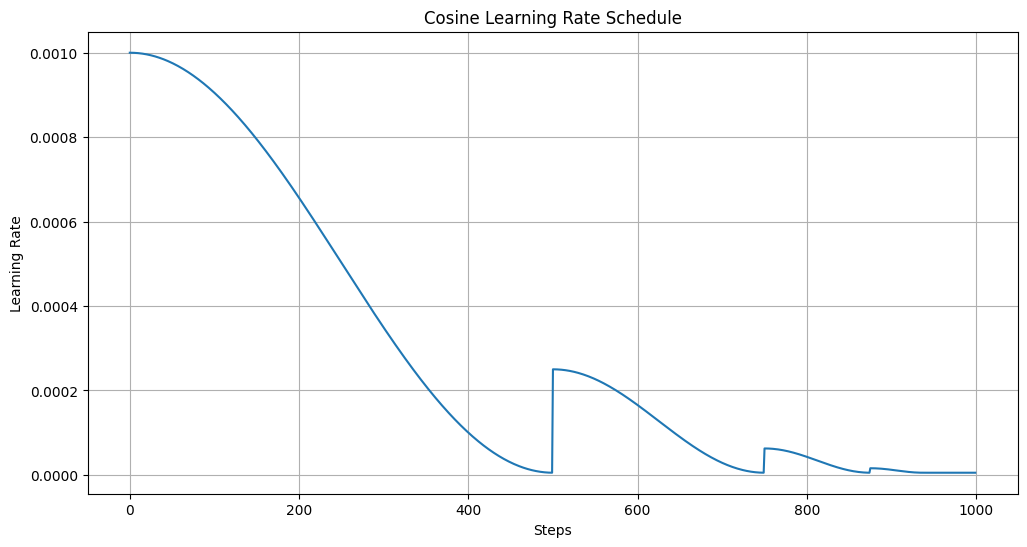

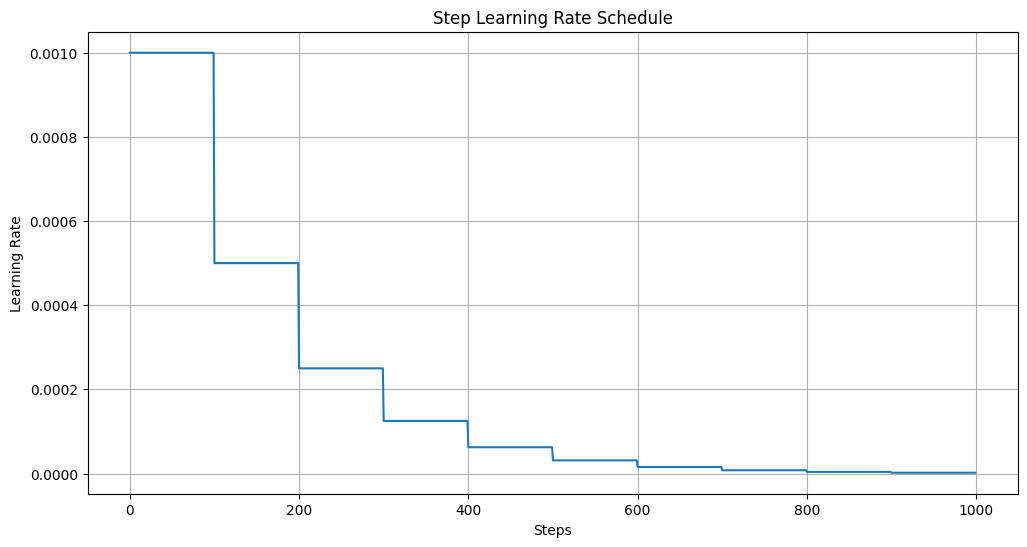

In [7]:
import torch

scheduler = CosineLRScheduler(
    optimizer=torch.optim.Adam([torch.zeros(1)], lr=1e-3),
    t_initial=500,
    lr_min=5e-6,
    cycle_mul=0.5,
    cycle_decay=0.25,
    cycle_limit=4,
)

plot_scheduler(scheduler, total_steps=1000, title="Cosine Learning Rate Schedule").show()

scheduler = StepLRScheduler(
    optimizer=torch.optim.Adam([torch.zeros(1)], lr=1e-3),
    decay_t=100,
    decay_rate=0.5,
)

plot_scheduler(scheduler, total_steps=1000, title="Step Learning Rate Schedule").show()